# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [1]:
data_url = r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(data_url)

In [4]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [7]:
apple["Date"] = pd.to_datetime(apple["Date"], format="%Y-%m-%d")

In [11]:
apple.shape

(8465, 6)

In [8]:
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [9]:
apple.set_index("Date", inplace=True)

In [10]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [13]:
apple.duplicated().sum()

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [16]:
apple.sort_index(inplace=True)

In [17]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [22]:
apple.resample("BM").max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,36.00,36.13,36.00,36.00,117258400,0.56
1981-01-30,34.50,34.75,34.50,34.50,13921600,0.54
1981-02-27,28.75,28.87,28.75,28.75,6966400,0.45
1981-03-31,26.75,27.00,26.75,26.75,57825600,0.42
1981-04-30,29.25,29.37,29.25,29.25,14504000,0.46
...,...,...,...,...,...,...
2014-03-31,546.52,549.00,539.59,544.99,93511600,77.42
2014-04-30,593.74,599.43,589.80,594.09,189977900,84.40
2014-05-30,637.98,644.17,628.90,635.38,141005200,90.77


### Step 10.  What is the difference in days between the first day and the oldest

In [32]:
print(apple.index.max() - apple.index.min())

12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [52]:
len(apple.groupby(apple.index.to_period("M")))

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: xlabel='Date'>

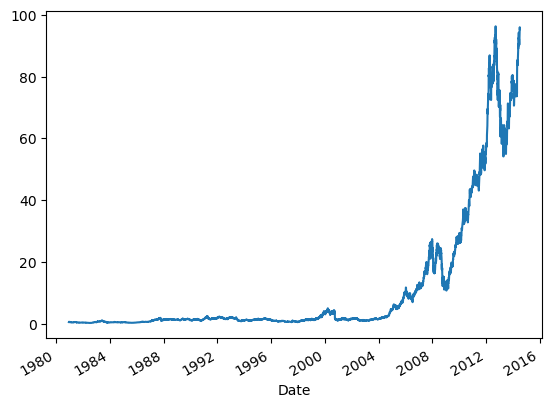

In [57]:
plt.plot(apple["Adj Close"], )
plt.show(wid)

### BONUS: Create your own question and answer it.

In [68]:
# What was the maximum High for month 7 in each year

filt = apple.index.month == 7
month_7 = apple.loc[filt]
month_7.groupby(month_7.index.to_period("Y"))[["High"]].max()

,High
Date,
1981,26.25
1982,14.50
1983,49.75
1984,27.62
1985,18.25
1986,37.75
1987,44.75
1988,47.50
1989,42.00


<Axes: xlabel='Date'>

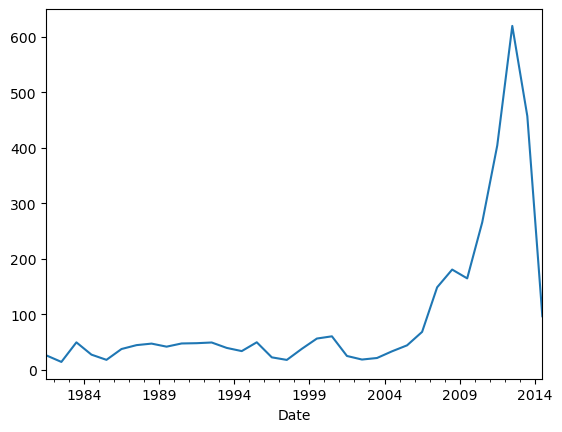

In [72]:
# Another Solution
month_groupped = apple.resample("M").max()
filt = month_groupped.index.month == 7
month_groupped[filt]['High'].plot()